In [2]:
import numpy as np
from keras.models import load_model
from termcolor import colored
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import pickle

with open('model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [4]:


# Memuat model dari file yang telah disimpan sebelumnya
model = load_model('model\model.hdf5')

def modelDemo(news_text):
    #News Labels
    labels = ['finance', 'food', 'hot', 'inet', 'oto', 'sport', 'travel']

    test_seq = pad_sequences(tokenizer.texts_to_sequences(news_text), maxlen=16)
    print("text seq: ", test_seq)

    # label = labels[np.argmax(model.predict(test_seq))]

    result = model.predict(test_seq)
    print("model precit: ", result)

    import matplotlib.pyplot as plt

    # Misalkan 'result' adalah array hasil prediksi dari model
    # Misalkan setiap elemen dalam 'result' adalah array persentase kelas

    # Memperkirakan jumlah kelas
    num_classes = len(result[0])
    print("num classes: ", num_classes)

    # Memisahkan hasil prediksi menjadi daftar persentase untuk setiap sampel
    predicted_percentages = []

    for prediction in result:
        percentages = [(prediction[i] * 100) for i in range(num_classes)]
        predicted_percentages.append(percentages)

    # Membuat plot untuk setiap sampel
    for percentages in predicted_percentages:
        plt.figure(figsize=(8, 4))
        plt.bar(range(num_classes), percentages, color='blue')
        plt.xlabel('Classes')
        plt.ylabel('Percentage')
        plt.title('Predicted Probabilities')
        plt.xticks(range(num_classes), labels, rotation=45, ha='right')  # Label sumbu x
        plt.yticks(range(0, 101, 10))   # Label sumbu y
        plt.show()

    test_preds = [labels[np.argmax(i)] for i in result]
    print("predict: ", test_preds)
    
    for news, label in zip(news_text, test_preds):
        # print('{} - {}'.format(news, label))
        print('{} - {}'.format(colored(news, 'yellow'), colored(label, 'blue')))

text seq:  [[   0    0    0    0    0    0    0    0    0    0    0  101 3041 2948
   884 1465]]
1/1 [==============================] - 3s 3s/step
model precit:  [[6.8779052e-11 1.7801987e-11 1.4794920e-11 1.4220187e-11 2.6705936e-07
  9.9999976e-01 1.5116276e-11]]
num classes:  7


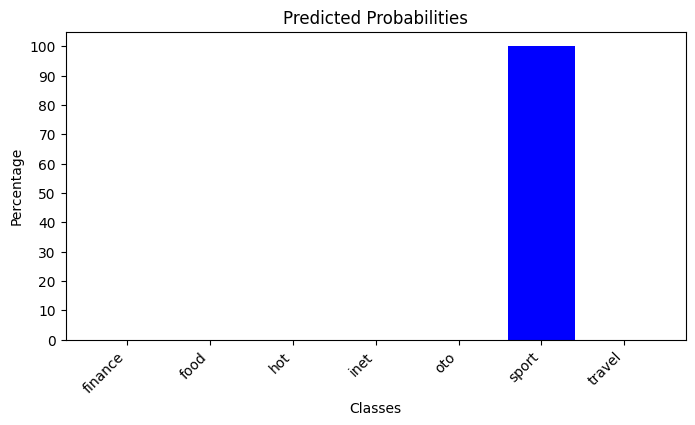

predict:  ['sport']
Alasan Taufik Hidayat Keras Mengkritik Junior-juniornya - sport


In [5]:
modelDemo(['Alasan Taufik Hidayat Keras Mengkritik Junior-juniornya'])

text seq:  [[   0    0    0    0    0    0    0    0  112 1223 2347  177  721 1980
     4   34]]
1/1 [==============================] - 0s 72ms/step
model precit:  [[3.2554917e-16 4.1458732e-19 3.6507174e-19 1.0000000e+00 1.4649224e-29
  4.1857718e-21 1.2508342e-18]]
num classes:  7


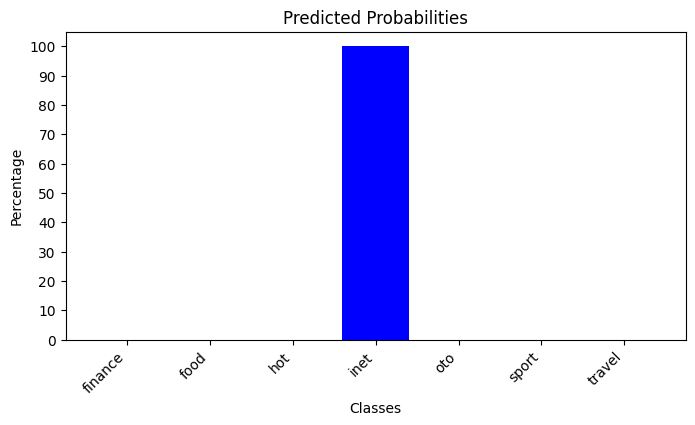

predict:  ['inet']
Daftar Paket Indosat Terbaru per Maret 2024 dan Cara Membelinya - inet


In [6]:
modelDemo(['Daftar Paket Indosat Terbaru per Maret 2024 dan Cara Membelinya'])

1/1 [==============================] - 0s 39ms/step


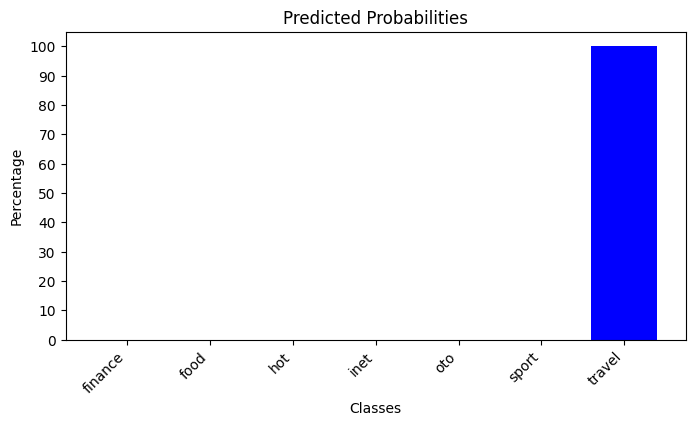

Kota Batu Wacanakan Odong-odong Wisata, Dikelola Langsung oleh Warga - travel


In [58]:
modelDemo(['Kota Batu Wacanakan Odong-odong Wisata, Dikelola Langsung oleh Warga'])